In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('scaled_data.csv')
df = df.drop('Unnamed: 0',axis=1)
df.head()

,Symbol,MarketCapitalization,BookValue,EPS,GrossProfitTTM,DilutedEPSTTM,QuarterlyEarningsGrowthYOY,QuarterlyRevenueGrowthYOY,Beta,totalRevenue,operatingIncome,operatingExpenses,netIncome,totalAssets,totalLiabilities,totalShareholderEquity,DividendPerShare,DividendYield,PEGRatio,currentDebt
0,MMM,0.014611,0.185726,0.030813,0.072455,0.030813,0.005576,0.259246,0.306135,0.052511,0.136363,0.153560,0.085521,0.013374,0.013513,0.071197,0.3000,4.038521e-07,0.162399,0.019271
1,AOS,0.001922,0.187909,0.064050,0.012118,0.064050,0.004049,0.282226,0.374433,0.005126,0.156861,0.018932,0.149107,0.000480,0.000432,0.061314,0.0610,9.878845e-08,0.160236,0.000065
2,ABT,0.060677,0.193458,0.063175,0.114734,0.063175,0.004963,0.267504,0.224237,0.069561,0.174141,0.112891,0.208002,0.019885,0.011153,0.174177,0.1040,1.223983e-07,0.185100,0.014719
3,ABBV,0.097039,0.184616,0.062075,0.189537,0.062075,0.001048,0.242729,0.162889,0.094060,0.195212,0.200754,0.251119,0.037452,0.035995,0.111405,0.2995,2.211867e-07,0.159875,0.027046
4,ACN,0.072812,0.206031,0.078490,0.097753,0.078490,0.003209,0.272890,0.363252,0.103980,0.175108,0.097170,0.207462,0.013556,0.007537,0.138665,0.2410,8.636223e-08,0.160759,0.000685


In [ ]:
#check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Symbol                      500 non-null    object 
 1   MarketCapitalization        500 non-null    float64
 2   BookValue                   500 non-null    float64
 3   EPS                         500 non-null    float64
 4   GrossProfitTTM              500 non-null    float64
 5   DilutedEPSTTM               500 non-null    float64
 6   QuarterlyEarningsGrowthYOY  500 non-null    float64
 7   QuarterlyRevenueGrowthYOY   500 non-null    float64
 8   Beta                        500 non-null    float64
 9   totalRevenue                500 non-null    float64
 10  operatingIncome             500 non-null    float64
 11  operatingExpenses           500 non-null    float64
 12  netIncome                   500 non-null    float64
 13  totalAssets                 500 non

In [ ]:
#segment off numerical data for elbow method
n = df.select_dtypes("float")
nums = n.values


In [ ]:
inertia = []
distortions = []
K = range(1,20) #want to set a higher number of clusters since I have 500 different companies
for k in K:
    km = KMeans(n_clusters=k) #initiate number of clusters
    km = km.fit(nums) #fit model to our data
    inertia.append(km.inertia_) #append the inertia from each cluster grouping to the empty list
    distortions.append(sum(np.min(cdist(nums, #this is just the formula for distortions
    km.cluster_centers_, 'euclidean'),axis=1)) / #using euclidean distance, could also use manhattan
    nums.shape[0])


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

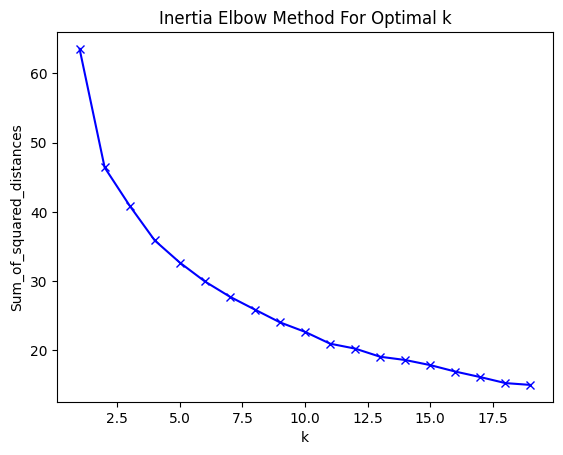

In [ ]:
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Inertia Elbow Method For Optimal k')
plt.show()

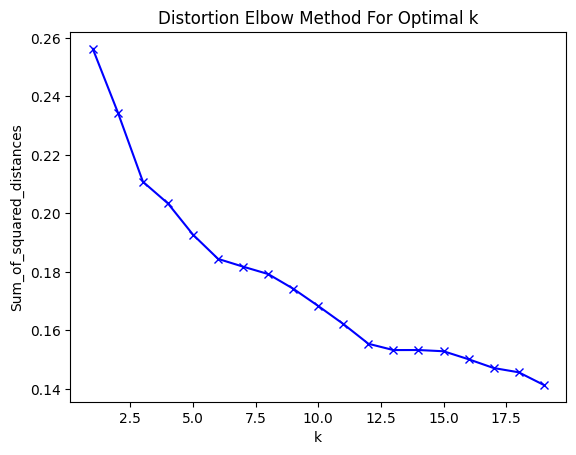

In [ ]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Distortion Elbow Method For Optimal k')
plt.show()

In [ ]:
model = KMeans(n_clusters=8, init='k-means++', random_state=100, algorithm='lloyd')
model.fit(nums)
pred = model.predict(nums)
pred

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([3, 4, 0, 1, 3, 4, 4, 0, 0, 0, 3, 4, 0, 4, 3, 4, 4, 0, 0, 2, 2, 0,
       2, 0, 0, 4, 0, 4, 0, 3, 0, 3, 4, 3, 4, 0, 4, 0, 4, 2, 4, 4, 0, 0,
       4, 0, 0, 1, 0, 4, 3, 0, 3, 0, 0, 4, 0, 5, 0, 4, 0, 0, 4, 0, 4, 0,
       3, 4, 4, 4, 4, 3, 0, 1, 3, 0, 0, 4, 1, 0, 4, 0, 0, 4, 1, 4, 4, 4,
       4, 3, 0, 4, 0, 4, 1, 1, 0, 0, 0, 4, 0, 0, 1, 4, 0, 0, 1, 0, 3, 1,
       5, 4, 0, 0, 0, 0, 0, 0, 1, 4, 0, 1, 0, 0, 0, 0, 4, 0, 0, 0, 1, 0,
       3, 4, 3, 1, 0, 3, 0, 3, 4, 0, 4, 4, 3, 0, 4, 0, 0, 0, 3, 4, 4, 4,
       0, 0, 4, 4, 0, 4, 0, 0, 0, 0, 1, 0, 4, 4, 0, 4, 4, 0, 4, 3, 0, 3,
       0, 4, 3, 0, 0, 0, 4, 0, 3, 2, 4, 0, 4, 0, 3, 3, 0, 4, 4, 0, 0, 4,
       0, 7, 4, 4, 0, 0, 4, 4, 0, 4, 0, 4, 3, 3, 4, 0, 7, 0, 0, 0, 0, 7,
       4, 0, 0, 4, 0, 0, 0, 4, 4, 4, 0, 1, 3, 0, 4, 4, 0, 3, 0, 0, 3, 3,
       0, 4, 3, 4, 0, 4, 0, 1, 0, 4, 0, 4, 4, 4, 4, 0, 4, 0, 0, 4, 0, 0,
       1, 4, 5, 0, 0, 0, 0, 4, 0, 0, 4, 0, 3, 0, 1, 0, 0, 3, 0, 4, 0, 4,
       3, 4, 4, 3, 0, 3, 4, 3, 3, 4, 1, 0, 4, 0, 0,

In [ ]:
df['kmeans'] = pred
df.head()

,Symbol,MarketCapitalization,BookValue,EPS,GrossProfitTTM,DilutedEPSTTM,QuarterlyEarningsGrowthYOY,QuarterlyRevenueGrowthYOY,Beta,totalRevenue,...,operatingExpenses,netIncome,totalAssets,totalLiabilities,totalShareholderEquity,DividendPerShare,DividendYield,PEGRatio,currentDebt,kmeans
0,MMM,0.014611,0.185726,0.030813,0.072455,0.030813,0.005576,0.259246,0.306135,0.052511,...,0.153560,0.085521,0.013374,0.013513,0.071197,0.3000,4.038521e-07,0.162399,0.019271,3
1,AOS,0.001922,0.187909,0.064050,0.012118,0.064050,0.004049,0.282226,0.374433,0.005126,...,0.018932,0.149107,0.000480,0.000432,0.061314,0.0610,9.878845e-08,0.160236,0.000065,4
2,ABT,0.060677,0.193458,0.063175,0.114734,0.063175,0.004963,0.267504,0.224237,0.069561,...,0.112891,0.208002,0.019885,0.011153,0.174177,0.1040,1.223983e-07,0.185100,0.014719,0
3,ABBV,0.097039,0.184616,0.062075,0.189537,0.062075,0.001048,0.242729,0.162889,0.094060,...,0.200754,0.251119,0.037452,0.035995,0.111405,0.2995,2.211867e-07,0.159875,0.027046,1
4,ACN,0.072812,0.206031,0.078490,0.097753,0.078490,0.003209,0.272890,0.363252,0.103980,...,0.097170,0.207462,0.013556,0.007537,0.138665,0.2410,8.636223e-08,0.160759,0.000685,3


In [ ]:
centers = np.array(model.cluster_centers_)
centers
centroid = pd.DataFrame(centers)
centroid

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.014328,0.202044,0.068002,0.033670,0.068002,0.009158,0.270073,0.239754,0.024715,0.159785,0.039538,0.161735,0.013650,0.011551,0.094976,0.088230,6.631264e-03,0.160620,0.016179
1,0.051419,0.205441,0.074758,0.184391,0.074758,0.002783,0.262837,0.229072,0.237488,0.183506,0.166445,0.231140,0.037950,0.028190,0.207178,0.160721,1.673209e-07,0.160410,0.022112
2,0.541494,0.198702,0.072255,0.678762,0.072255,0.025023,0.296858,0.304057,0.598934,0.389938,0.463892,0.645967,0.099834,0.054425,0.645977,0.064125,5.498470e-04,0.160248,0.032961
3,0.023300,0.213622,0.084022,0.044202,0.084022,0.003868,0.275475,0.317673,0.039100,0.162270,0.045822,0.173493,0.014065,0.012638,0.087943,0.333057,2.810699e-06,0.175754,0.021813
4,0.016031,0.196859,0.069024,0.033361,0.069024,0.012693,0.282318,0.443595,0.024962,0.161546,0.040509,0.162199,0.010162,0.008536,0.086885,0.048880,6.784273e-03,0.164099,0.010164
5,0.081640,0.222902,0.070878,0.400745,0.070878,0.002825,0.255566,0.393095,0.155314,0.178085,0.126556,0.352001,0.751114,0.745914,0.820407,0.105000,1.879466e-07,0.161405,0.276603
6,0.005765,1.000000,1.000000,0.018713,1.000000,0.002905,0.228007,0.338169,0.016232,0.178654,0.014466,0.162209,0.001115,0.000600,0.066997,0.008350,2.604465e-01,0.163130,0.006730
7,0.025093,0.246048,0.076592,0.132463,0.076592,0.004425,0.271741,0.432578,0.163992,0.170269,0.273217,0.222446,0.202927,0.198601,0.294819,0.209350,2.106244e-07,0.160511,0.742515


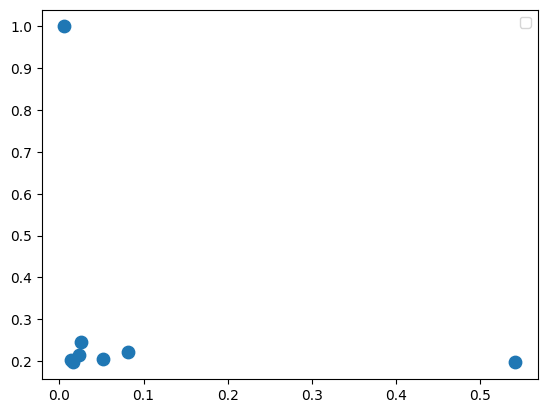

In [ ]:
plt.scatter(centers[:,0] , centers[:,1] , s = 80)
plt.legend()
plt.show()

In [ ]:
# Now I will do clustering + PCA
# The first step is determning how many components we want to have
from sklearn.decomposition import PCA

In [ ]:
pca = PCA()
pca_fit = pca.fit(nums)

In [ ]:
pca_fit.explained_variance_ratio_

array([3.64122700e-01, 1.47159340e-01, 1.12730098e-01, 9.30280482e-02,
       4.87783168e-02, 4.61942516e-02, 3.93042650e-02, 2.86901140e-02,
       2.43886788e-02, 2.37136391e-02, 2.09191130e-02, 1.55637346e-02,
       1.48631339e-02, 8.06602102e-03, 4.80818587e-03, 4.19979304e-03,
       3.46851014e-03, 2.05625038e-06, 3.87084777e-34])

Text(0, 0.5, 'Explained Variance')

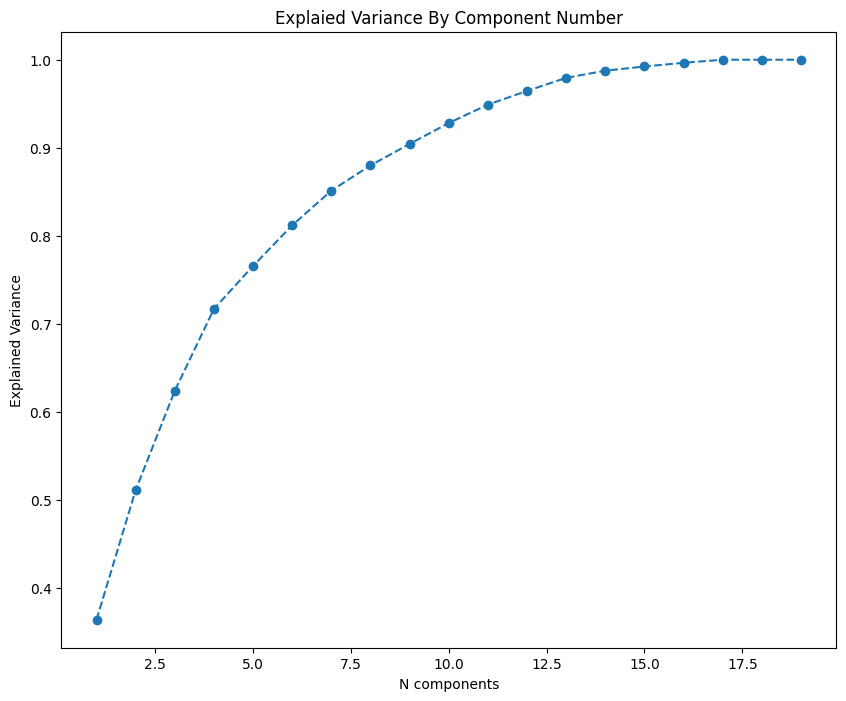

In [ ]:
#plot the evr
# set number of components to 80% EV
plt.figure(figsize=(10,8))
plt.plot(range(1,20),pca_fit.explained_variance_ratio_.cumsum(), marker = 'o',linestyle = '--')
plt.title('Explaied Variance By Component Number')
plt.xlabel('N components')
plt.ylabel('Explained Variance')

In [ ]:
pca = PCA(n_components = 7)
pca_nums = pca.fit_transform(nums)

In [ ]:
#elbow method for the PCA
inertia = []
distortions = []
K = range(1,20) #want to set a higher number of clusters since I have 500 different companies
for k in K:
    km = KMeans(n_clusters=k) #initiate number of clusters
    km = km.fit(pca_nums) #fit model to our data
    inertia.append(km.inertia_) #append the inertia from each cluster grouping to the empty list
    distortions.append(sum(np.min(cdist(pca_nums, #this is just the formula for distortions
    km.cluster_centers_, 'euclidean'),axis=1)) / #using euclidean distance, could also use manhattan
    nums.shape[0])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

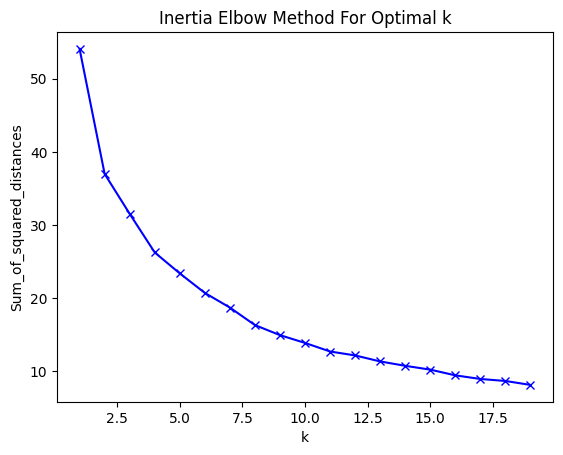

In [ ]:
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Inertia Elbow Method For Optimal k')
plt.show()

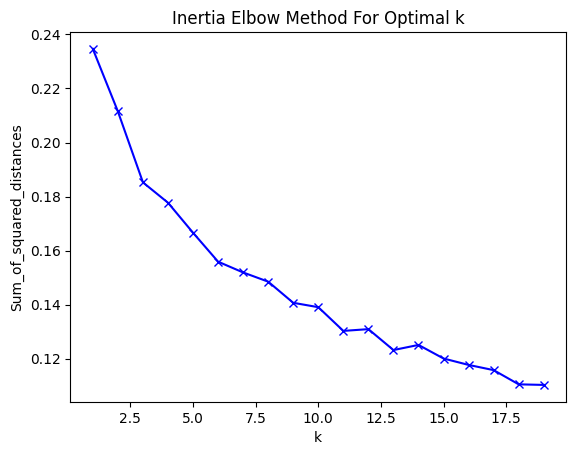

In [ ]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Inertia Elbow Method For Optimal k')
plt.show()

In [ ]:
#PCA elbow method suggests 5 clusters
model_pca = KMeans(n_clusters=5, init='k-means++', random_state=100, algorithm='lloyd')
model_pca.fit(pca_nums)
pred_pca = model_pca.predict(pca_nums)
df['kmeans_pca'] = pred_pca

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
print(df.groupby('kmeans').size())
print(df.groupby('kmeans_pca').size())

kmeans
0    220
1     33
2      8
3     61
4    168
5      4
6      1
7      5
dtype: int64
kmeans_pca
0    192
1    219
2      9
3      6
4     74
dtype: int64


In [ ]:
returns = pd.read_csv('/content/price_changes.csv')

In [ ]:
df = df.merge(returns[['Ticker','diffs']], how = 'left', left_on = 'Symbol', right_on = 'Ticker')
df.head()

,Symbol,MarketCapitalization,BookValue,EPS,GrossProfitTTM,DilutedEPSTTM,QuarterlyEarningsGrowthYOY,QuarterlyRevenueGrowthYOY,Beta,totalRevenue,...,totalLiabilities,totalShareholderEquity,DividendPerShare,DividendYield,PEGRatio,currentDebt,kmeans,kmeans_pca,Ticker,diffs
0,MMM,0.014611,0.185726,0.030813,0.072455,0.030813,0.005576,0.259246,0.306135,0.052511,...,0.013513,0.071197,0.3000,4.038521e-07,0.162399,0.019271,3,4,MMM,-0.003108
1,AOS,0.001922,0.187909,0.064050,0.012118,0.064050,0.004049,0.282226,0.374433,0.005126,...,0.000432,0.061314,0.0610,9.878845e-08,0.160236,0.000065,4,0,AOS,0.093061
2,ABT,0.060677,0.193458,0.063175,0.114734,0.063175,0.004963,0.267504,0.224237,0.069561,...,0.011153,0.174177,0.1040,1.223983e-07,0.185100,0.014719,0,1,ABT,0.059801
3,ABBV,0.097039,0.184616,0.062075,0.189537,0.062075,0.001048,0.242729,0.162889,0.094060,...,0.035995,0.111405,0.2995,2.211867e-07,0.159875,0.027046,1,4,ABBV,0.111861
4,ACN,0.072812,0.206031,0.078490,0.097753,0.078490,0.003209,0.272890,0.363252,0.103980,...,0.007537,0.138665,0.2410,8.636223e-08,0.160759,0.000685,3,4,ACN,0.050403


In [ ]:
df.groupby('kmeans')['diffs'].mean()

kmeans
0    0.041109
1    0.036862
2    0.042866
3    0.055585
4    0.064135
5    0.079568
6    0.089605
7    0.028114
Name: diffs, dtype: float64

In [ ]:
df.groupby('kmeans_pca')['diffs'].mean()

kmeans_pca
0    0.065213
1    0.042154
2    0.040002
3    0.055241
4    0.038837
Name: diffs, dtype: float64

In [ ]:
df.diffs.mean()

0.0506534212648942

In [ ]:
print(df.groupby('kmeans').size())
print(df.groupby('kmeans_pca').size())

kmeans
0    220
1     33
2      8
3     61
4    168
5      4
6      1
7      5
dtype: int64
kmeans_pca
0    192
1    219
2      9
3      6
4     74
dtype: int64


In [ ]:
m = df['kmeans'] == 4
md = df[m]
md.head(30)

,Symbol,MarketCapitalization,BookValue,EPS,GrossProfitTTM,DilutedEPSTTM,QuarterlyEarningsGrowthYOY,QuarterlyRevenueGrowthYOY,Beta,totalRevenue,...,totalLiabilities,totalShareholderEquity,DividendPerShare,DividendYield,PEGRatio,currentDebt,kmeans,kmeans_pca,Ticker,diffs
1,AOS,0.001922,0.187909,0.064050,0.012118,0.064050,0.004049,0.282226,0.374433,0.005126,...,0.000432,0.061314,0.061000,9.878845e-08,0.160236,0.000065,4,0,AOS,0.093061
5,ADBE,0.088992,0.202282,0.080547,0.074402,0.080547,0.004082,0.303770,0.402539,0.030777,...,0.003893,0.109027,0.000325,5.702679e-01,0.160586,0.000000,4,0,ADBE,-0.120901
6,AMD,0.087450,0.201256,0.057615,0.059439,0.057615,0.159300,0.298743,0.491387,0.036453,...,0.003517,0.236219,0.000000,0.000000e+00,0.158956,0.004911,4,0,AMD,0.256068
11,ABNB,0.028426,0.189073,0.073276,0.036704,0.073276,0.011879,0.326032,0.372922,0.012647,...,0.003068,0.073629,0.000000,0.000000e+00,0.159818,0.015066,4,0,ABNB,0.136881
13,ALB,0.002452,0.231099,0.114008,0.019834,0.114008,0.001068,0.299820,0.484436,0.010981,...,0.002177,0.081455,0.079750,8.574091e-08,0.159348,0.000047,4,0,ALB,0.042269
15,ALGN,0.005373,0.209276,0.068368,0.017887,0.068368,0.009840,0.284022,0.494711,0.005110,...,0.000657,0.067302,0.000000,0.000000e+00,0.160099,0.000634,4,0,ALGN,0.136428
16,ALLE,0.001809,0.188929,0.069407,0.012086,0.069407,0.004351,0.263914,0.346026,0.004212,...,0.000865,0.058711,0.088000,9.071140e-08,0.159930,0.000082,4,0,ALLE,0.036484
25,AAL,0.001232,0.175738,0.059000,0.056756,0.059000,0.000067,0.258528,0.471442,0.075911,...,0.020866,0.036936,0.005000,8.536813e-04,0.158410,0.021409,4,0,AAL,0.045678
27,AXP,0.047348,0.203787,0.079386,0.133258,0.079386,0.004033,0.295153,0.369296,0.109305,...,0.069049,0.146302,0.120000,7.020814e-08,0.159698,0.008455,4,0,AXP,0.091739
32,AME,0.010565,0.203200,0.068062,0.015718,0.068062,0.003552,0.285458,0.366576,0.008936,...,0.001431,0.079820,0.050000,4.100652e-08,0.160729,0.001478,4,0,AME,0.112990
